In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [7]:
vv = [0,1,5,3]
print(sorted(vv))

[0, 1, 3, 5]


In [14]:
def act_thresh(eps, α, u):
    if u == 0:
        return eps
    elif u == 1:
        return 1
    
    α1 = 1 - α
    x = (u * (1 - np.power(eps, α1)) + np.power(eps, α1)) ** (1 / α1)
    return x

def ab_mask_thresh(mu, eps, α, m, r_s, r_i, α_m):
    t_r_s = act_thresh(eps, α, 1-r_s)
    t_r_i = act_thresh(eps, α, 1-r_i)
    n_rev_r_s = (1-t_r_s**(1-α))/(1 - eps**(1-α))
    n_rev_r_i = (1-t_r_i**(1-α))/(1 - eps**(1-α))
    
    mean_a = (1 - α)*(1- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a2 = (1 - α)*(1- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean_a_s_rev = (1 - α)*(1 - t_r_s**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a_i_rev = (1 - α)*(1 - t_r_i**(2-α))/((2-α)* (1-eps**(1-α)))

    mean2_a_s_rev = (1 - α)*(1 - t_r_s**(3-α))/((3-α)* (1-eps**(1-α)))
    mean2_a_i_rev = (1 - α)*(1 - t_r_i**(3-α))/((3-α)* (1-eps**(1-α)))

    n_rev = sorted([n_rev_r_i, n_rev_r_s]) #il più piccolo corrisponde alla soglia maggiore
    m_a = sorted([mean_a_i_rev, mean_a_s_rev])#più piccolo soglia minore
    m2_a = sorted([mean2_a_i_rev, mean2_a_s_rev])#più piccolo soglia minore

    f_rev_n = 1 + (α_m - 1) * n_rev[1] + α_m *(α_m -1)* n_rev[0]
    f_rev_a = mean_a + (α_m - 1) * m_a[0] + α_m *(α_m -1)* m_a[1]
    f_rev_a2 = mean_a2 + (α_m - 1)* m2_a[0] + α_m *(α_m -1)* m2_a[1]

    λ_t = mu* (m*(f_rev_a + np.sqrt(f_rev_n * f_rev_a2)))**(-1)
    return λ_t, mean_a

def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

In [15]:
for s in np.linspace(0,1,15):
    print(act_thresh(0.001, 2.1, s))
    

0.001
0.0010696546468190436
0.001150344022194217
0.0012449731714695045
0.0013575771720103172
0.001493934208814955
0.0016626288113134968
0.0018770066301113065
0.00215903958314658
0.0025477175938505895
0.003119700728970056
0.004050075373681458
0.00584905190158849
0.010948901345882542
1


In [108]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a


def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

In [16]:

def ab_mask_thresh_buu(mu, eps, α, m, r_s, r_i, α_m):
    t_r_s = act_thresh(eps, α, r_s)
    t_r_i = act_thresh(eps, α, r_i)
    n_r_s = (t_r_s**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    n_r_i = (t_r_i**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    
    mean_a = (1 - α)*(1- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a2 = (1 - α)*(1- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean_a_s = (1 - α)*(t_r_s**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a_i = (1 - α)*(t_r_i**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))

    mean2_a_s = (1 - α)*(t_r_s**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean2_a_i = (1 - α)*(t_r_i**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))

    n_rev = sorted([n_r_i, n_r_s])#il più piccolo corrisponde alla soglia maggiore
    m_a = sorted([mean_a_i, mean_a_s])#il più piccolo corrisponde alla soglia minore
    m2_a = sorted([mean2_a_i, mean2_a_s])# il più piccolo corrisponde alla soglia minore

    f_rev_n = 1 + (α_m-1) * n_rev[1] + α_m *(α_m -1)* n_rev[0]
    f_rev_a = mean_a + (α_m-1)  * m_a[1] + α_m *(α_m -1)* m_a[0]
    f_rev_a2 = mean_a2 + (α_m-1) * m2_a[1] + α_m *(α_m -1)* m2_a[0]

    λ_t = mu* (m*(f_rev_a + np.sqrt(f_rev_n * f_rev_a2)))**(-1)
    return λ_t, mean_a


In [17]:
lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0.8, 0.1, 0.9)
print(lam_t)
lam_tu, minau = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0.8, 0.1, 0.9)
print(lam_tu)

0.17283514399105865
0.17283514399105865


## Face mask effectiveness 10%

In [25]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,0.9)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
iErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id,0.9)[0]
print(iErri)
iErri_n = np.copy(iErri)
iErri_n[iErri_n<1] = np.nan

[[1.75       1.74921657 1.74843221 ... 1.65598494 1.65020824 1.575     ]
 [1.74921657 1.74851118 1.74772649 ... 1.65524703 1.64947114 1.57429492]
 [1.74843221 1.74772649 1.74701996 ... 1.65450826 1.64873318 1.57358899]
 ...
 [1.65598494 1.65524703 1.65450826 ... 1.56823914 1.56253836 1.49038645]
 [1.65020824 1.64947114 1.64873318 ... 1.56253836 1.55740624 1.48518741]
 [1.575      1.57429492 1.57358899 ... 1.49038645 1.48518741 1.4175    ]]


In [26]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)

iErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri2[j, i] = lam /  ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.9)[0]
print(iErri2)
iErri2_n = np.copy(iErri2)
iErri2_n[iErri2_n<1] = np.nan

[[1.75       1.67958281 1.67416882 ... 1.58688186 1.58610071 1.58531966]
 [1.67958281 1.59825599 1.59275128 ... 1.50875616 1.50801229 1.50726855]
 [1.67416882 1.59275128 1.58677039 ... 1.50287516 1.50213241 1.50138978]
 ...
 [1.58688186 1.50875616 1.50287516 ... 1.42047417 1.41969789 1.41892167]
 [1.58610071 1.50801229 1.50213241 ... 1.41969789 1.41898735 1.41821073]
 [1.58531966 1.50726855 1.50138978 ... 1.41892167 1.41821073 1.4175    ]]


In [109]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
rErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        rErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.9, r_sd, r_id, 0, 0, 0, 0)[0]
print(rErri)


[[1.75       1.74823232 1.74646465 ... 1.57853535 1.57676768 1.575     ]
 [1.74823232 1.74646643 1.74470054 ... 1.57694087 1.57517498 1.57340909]
 [1.74646465 1.74470054 1.74293644 ... 1.57534639 1.57358229 1.57181818]
 ...
 [1.57853535 1.57694087 1.57534639 ... 1.42387078 1.4222763  1.42068182]
 [1.57676768 1.57517498 1.57358229 ... 1.4222763  1.4206836  1.41909091]
 [1.575      1.57340909 1.57181818 ... 1.42068182 1.41909091 1.4175    ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_11760/3233758099.py:14: UserWarning: No contour levels were found within the data range.
  contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
C:\Users\crino\AppData\Local\Temp/ipykernel_11760/3233758099.py:51: UserWarning: No contour levels were found within the data range.
  contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])


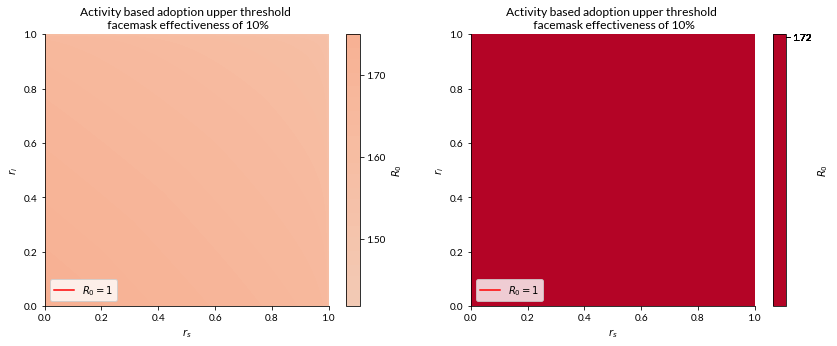

In [27]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
contour2 = ax[0].contour(r_s, r_i, rErri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.04))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.04))

# Apply the custom formatter to the color bar ticks
cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()


# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_10_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

C:\Users\crino\AppData\Local\Temp/ipykernel_11760/3083455849.py:10: UserWarning: No contour levels were found within the data range.
  contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
C:\Users\crino\AppData\Local\Temp/ipykernel_11760/3083455849.py:41: UserWarning: No contour levels were found within the data range.
  contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])


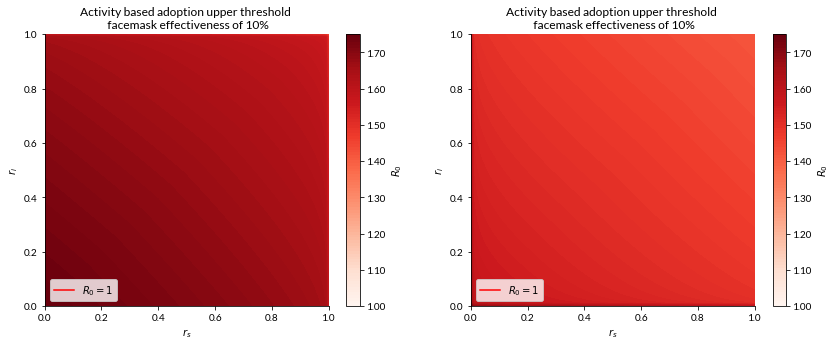

In [46]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax= np.nanmax(iErri_n)
plot_surface = ax[0].contourf(r_s, r_i, iErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])
contour2 = ax[0].contour(r_s, r_i, rErri, colors="black", linestyles="-.", levels=[1])
# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")
cbar.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels = np.linspace(1, np.nanmax(iErri2_n), 100)
ax[1].set_facecolor("lightgrey")

plot_surface = ax[1].contourf(r_s, r_i, iErri2_n, cmap="Reds", levels = contour_levels)
# Plot contour lines
contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])
contour2 = ax[1].contour(r_s, r_i, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

# Apply the custom formatter to the color bar ticks
cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()


# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption lower threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_10_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## Face mask effectiveness 30%

In [127]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t

r_s = np.linspace(0, 1, 100)
r_i = np.linspace(0, 1, 100)
sErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.7)[0]
sErri_n = np.copy(sErri)
sErri_n[sErri_n<1] = np.nan
print(sErri)

[[1.75       1.74764863 1.74529226 ... 1.45616908 1.43934186 1.225     ]
 [1.74764863 1.74600071 1.74364202 ... 1.45424702 1.43742548 1.22335404]
 [1.74529226 1.74364202 1.74198897 ... 1.45232108 1.4355052  1.22170458]
 ...
 [1.45616908 1.45424702 1.45232108 ... 1.22240478 1.20608825 1.01931836]
 [1.43934186 1.43742548 1.4355052  ... 1.20608825 1.19466342 1.0075393 ]
 [1.225      1.22335404 1.22170458 ... 1.01931836 1.0075393  0.8575    ]]


In [128]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
sErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri2[j, i] = lam / ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.7)[0]
print(sErri2)
sErri2_n = np.copy(sErri2)
sErri2_n[sErri2_n<1] = np.nan

[[1.75       1.58093595 1.5676093  ... 1.32095995 1.31853529 1.31610687]
 [1.58093595 1.30676756 1.29245296 ... 1.08232886 1.08034487 1.07835808]
 [1.5676093  1.29245296 1.27308937 ... 1.06431964 1.06235179 1.06038116]
 ...
 [1.32095995 1.08232886 1.06431964 ... 0.86545374 0.86317591 0.86089274]
 [1.31853529 1.08034487 1.06235179 ... 0.86317591 0.86148493 0.85919714]
 [1.31610687 1.07835808 1.06038116 ... 0.86089274 0.85919714 0.8575    ]]


In [129]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
rErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        rErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.7, r_sd, r_id, 0, 0, 0, 0)[0]
print(rErri)


[[1.75       1.74469697 1.73939394 ... 1.23560606 1.23030303 1.225     ]
 [1.74469697 1.73941001 1.73412305 ... 1.2318618  1.22657484 1.22128788]
 [1.73939394 1.73412305 1.72885216 ... 1.22811754 1.22284665 1.21757576]
 ...
 [1.23560606 1.2318618  1.22811754 ... 0.87241276 0.8686685  0.86492424]
 [1.23030303 1.22657484 1.22284665 ... 0.8686685  0.86494031 0.86121212]
 [1.225      1.22128788 1.21757576 ... 0.86492424 0.86121212 0.8575    ]]


ValueError: vmin, vcenter, and vmax must be in ascending order

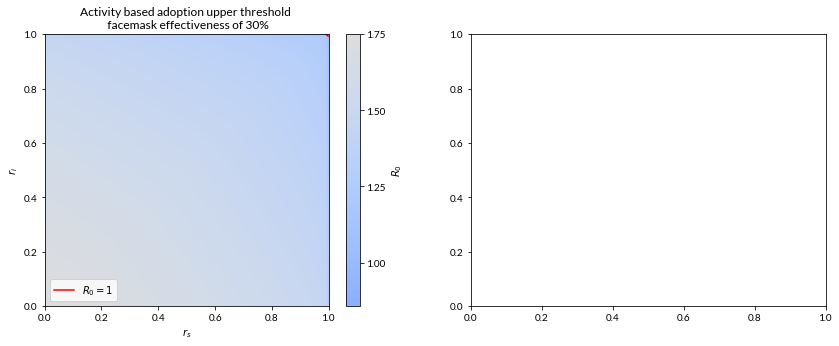

In [130]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(sErri.min(), sErri.max(), 100)

midpoint = 1.75  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, sErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.25))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.25))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(sErri2.min(), sErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, sErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_30_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

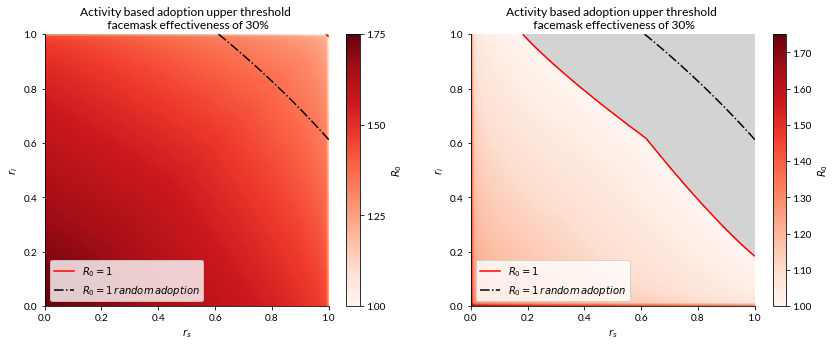

In [131]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax = np.nanmax(sErri_n)
plot_surface = ax[0].contourf(r_s, r_i, sErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])
contour2 = ax[0].contour(r_s, r_i, rErri, colors="black", linestyles="-.", levels=[1])
# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.25))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.25))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
ax[0].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels = np.linspace(1, np.nanmax(sErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax =np.nanmax(sErri2_n)
plot_surface = ax[1].contourf(r_s, r_i, sErri2_n, cmap="Reds", levels = contour_levels)
# Plot contour lines
contour = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])
contour2 = ax[1].contour(r_s, r_i, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
ax[1].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption lower threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_30_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## Face mask effectiveness 50%

In [132]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t
print(lam_t)
print(ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,0.5))
r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
cErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        cErri[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.5)[0]
print(cErri)
cErri_n = np.copy(cErri)
cErri_n[cErri_n<1] = np.nan

0.1654468827603741
(0.1654468827603741, 0.005489691793543476)
[[1.75       1.74607922 1.74214642 ... 1.2342899  1.207055   0.875     ]
 [1.74607922 1.74411539 1.74017798 ... 1.23163509 1.20441018 0.87303961]
 [1.74214642 1.74017798 1.7382058  ... 1.22897264 1.20175767 0.87107321]
 ...
 [1.2342899  1.23163509 1.22897264 ... 0.90056149 0.8739115  0.61714495]
 [1.207055   1.20441018 1.20175767 ... 0.8739115  0.86058644 0.6035275 ]
 [0.875      0.87303961 0.87107321 ... 0.61714495 0.6035275  0.4375    ]]


In [142]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t

r_s1 = np.linspace(0.0, 0.1, 100)
r_i1 = np.linspace(0.0, 0.1, 100)
cErri2 = np.zeros((len(r_s1), len(r_i1)))

for i, r_sd  in enumerate(r_s1):
    for j, r_id in enumerate(r_i1):
        cErri2[j, i] = lam / ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.5)[0]
print(cErri2)
cErri2_n = np.copy(cErri2)
cErri2_n[cErri2_n<1] = np.nan

[[1.75       1.63029621 1.59852141 ... 1.48045766 1.4799938  1.47953137]
 [1.63029621 1.3573651  1.31891905 ... 1.19372512 1.19332649 1.19292942]
 [1.59852141 1.31891905 1.23884008 ... 1.11028829 1.10990706 1.10952744]
 ...
 [1.48045766 1.19372512 1.11028829 ... 0.87115775 0.87080939 0.87046279]
 [1.4799938  1.19332649 1.10990706 ... 0.87080939 0.87039924 0.87005264]
 [1.47953137 1.19292942 1.10952744 ... 0.87046279 0.87005264 0.86964606]]


In [134]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
rErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        rErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.5, r_sd, r_id, 0, 0, 0, 0)[0]
print(rErri)


[[1.75       1.74116162 1.73232323 ... 0.89267677 0.88383838 0.875     ]
 [1.74116162 1.73236787 1.72357413 ... 0.8881683  0.87937455 0.87058081]
 [1.73232323 1.72357413 1.71482502 ... 0.88365983 0.87491072 0.86616162]
 ...
 [0.89267677 0.8881683  0.88365983 ... 0.45535532 0.45084685 0.44633838]
 [0.88383838 0.87937455 0.87491072 ... 0.45084685 0.44638302 0.44191919]
 [0.875      0.87058081 0.86616162 ... 0.44633838 0.44191919 0.4375    ]]


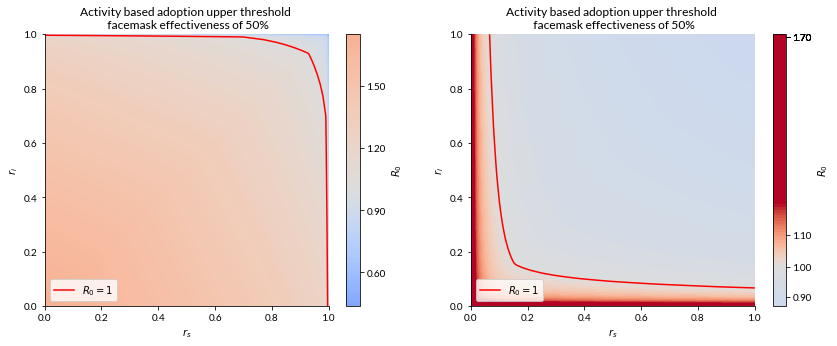

In [135]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(cErri.min(), cErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, cErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, cErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.3))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.3))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 50%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(cErri2.min(), cErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, cErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, cErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption lower threshold \n facemask effectiveness of 50%")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_50_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
# Show the plot
plt.show()



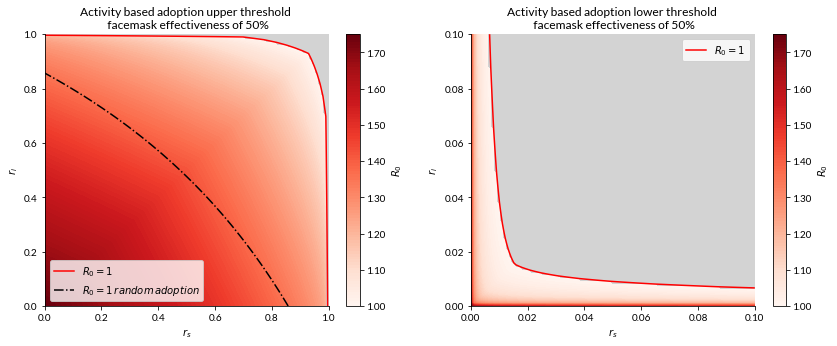

In [145]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(1, np.nanmax(cErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax = np.nanmax(cErri_n)
plot_surface = ax[0].contourf(r_s, r_i, cErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, cErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])
contour2 = ax[0].contour(r_s, r_i, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
ax[0].plot(0, 0, color="black", linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 50%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels = np.linspace(1, np.nanmax(cErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax = np.nanmax(cErri2_n)
plot_surface = ax[1].contourf(r_s1, r_i1, cErri2_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[1].contour(r_s1, r_i1, cErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])
#contour2 = ax[1].contour(r_s, r_i, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,random\,adoption$")
ax[1].legend(loc="upper right")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption lower threshold \n facemask effectiveness of 50%")
ax[1].set_xlim(r_s1.min(), r_s1.max())  # Set x-axis limits
ax[1].set_ylim(r_i1.min(), r_i1.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_50_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
# Show the plot
plt.show()

